In [1]:
import numpy as np

In [2]:
#%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation

In [3]:
!jupyter labextension install jupyter-matplotlib

Building jupyterlab assets (production, minimized)


In [4]:
%matplotlib inline

In [5]:
from double_pendulum import DoublePendulum

In [6]:
pendulum = DoublePendulum()
pendulum.SetMasses(1, 1)
pendulum.SetAngles(1, 1)
pendulum.SetLengths(1, 1)
pendulum.Simulate(n_steps=500000, dt=0.0001, n_record=1000)

In [7]:
data = pendulum.Data()

In [8]:
del pendulum

In [9]:
time = data[:, 0]
x1 = data[:, 1]
y1 = data[:, 2]
x2 = data[:, 4]
y2 = data[:, 5]
th1 = data[:, 3]
th2 = data[:, 6]

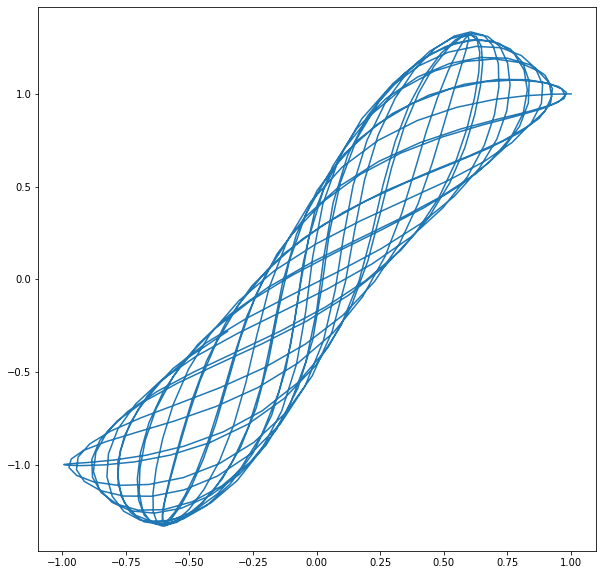

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(th1, th2)
plt.show()

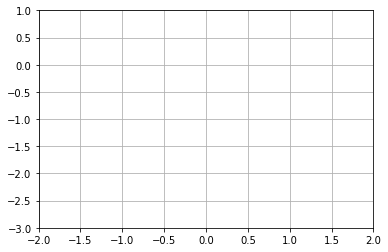

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(f"time = {time[i]:0.02f}")
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(time)),
                              interval=15, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
#plt.show()

In [12]:
from IPython.display import HTML

In [13]:
HTML(ani.to_jshtml(fps=10))